In [2]:
import cv2
import matplotlib.pyplot as plt
import csv
# Import datasets, classifiers and performance metrics
from skimage.feature import hog
from skimage.transform import resize
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import skimage.io as io
from commonfunctions import *
import pandas as pd

In [3]:
def extract_hog_features(img):
    """
    TODO
    You won't implement anything in this function. You just need to understand it 
    and understand its parameters (i.e win_size, cell_size, ... etc)
    """
#     img = cv2.resize(img, target_img_size)
    win_size = (28, 28)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h.flatten()

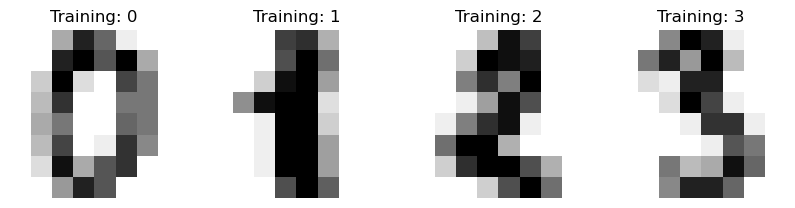

In [4]:
digits = datasets.load_digits()

digitsHead = pd.read_csv('train.csv') 



_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
digitsHead.head()
digitsHead.shape

(42000, 785)

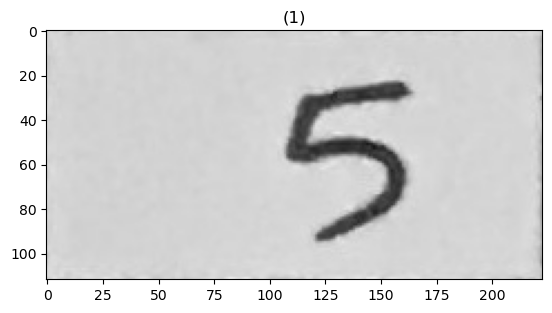

(112, 223)


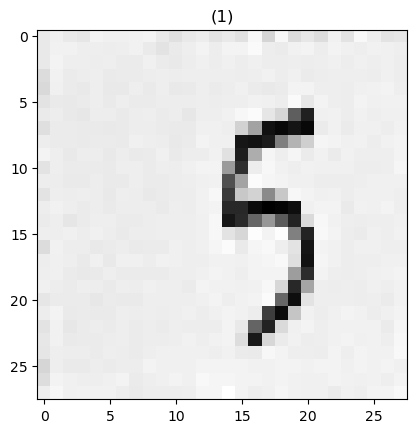

NameError: name 'predicted' is not defined

In [6]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
img = cv2.imread('./images/88.jpg')
show_images([img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)

show_images([img])


# Predict the value of the digit on the test subset
# predicted = clf.predict(img.reshape(1,-1))
print(predicted)

In [ ]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, prediction in zip(axes, img.reshape(1,-1), predicted):
#     ax.set_axis_off()
#     image = image.reshape(8, 8)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Prediction: {prediction}")

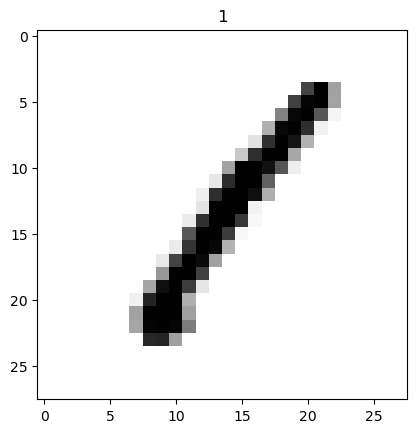

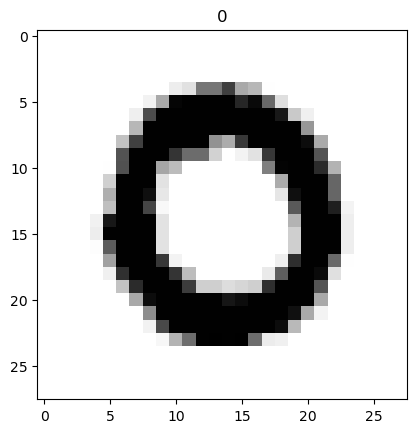

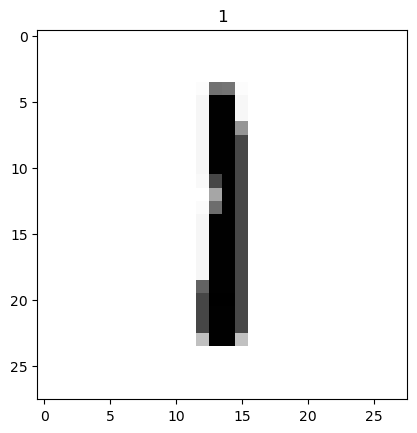

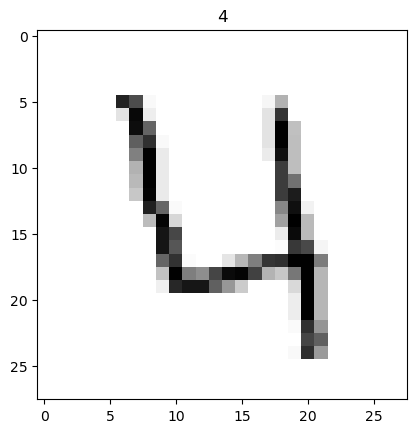

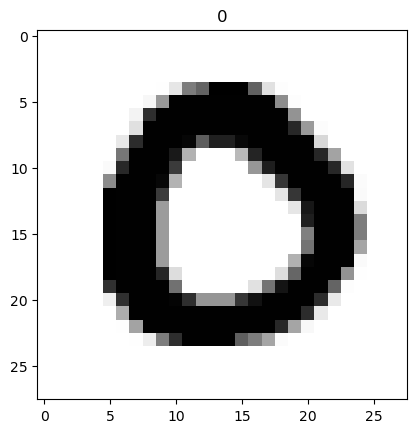

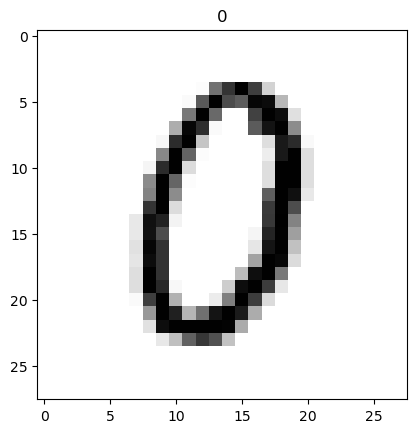

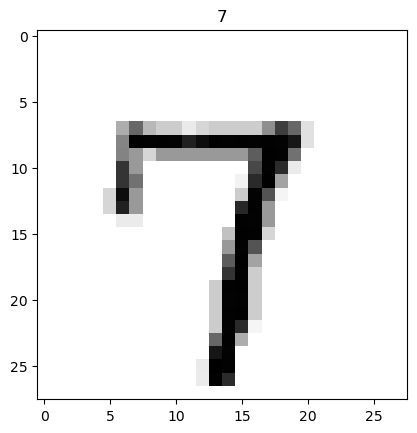

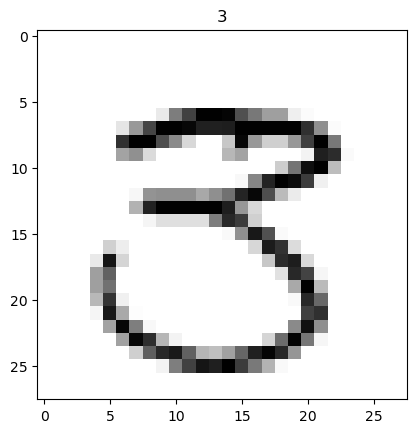

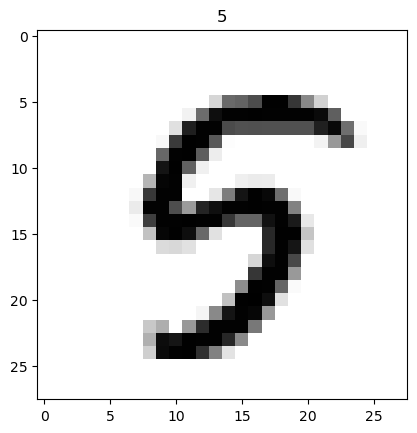

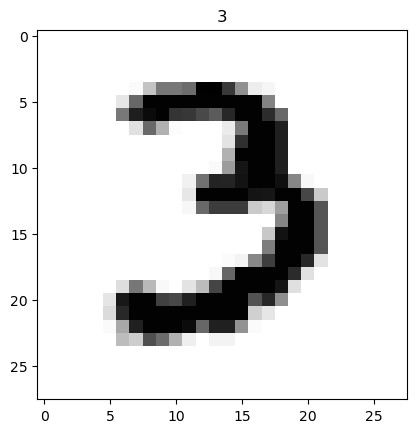

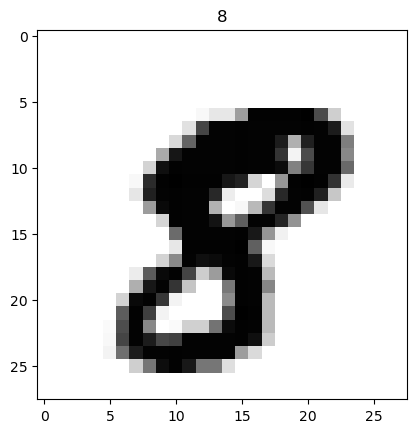

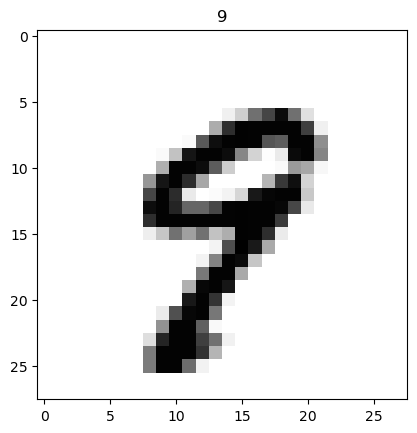

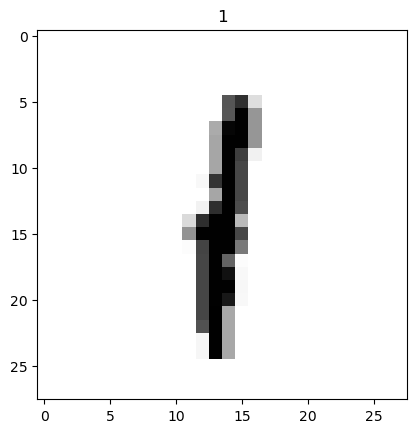

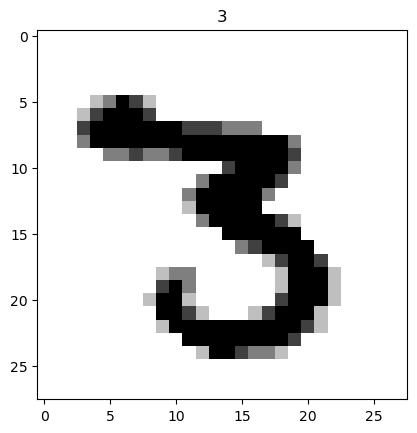

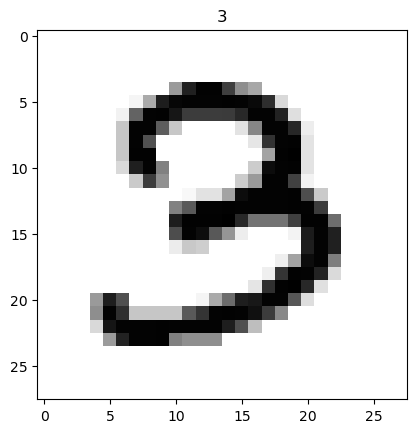

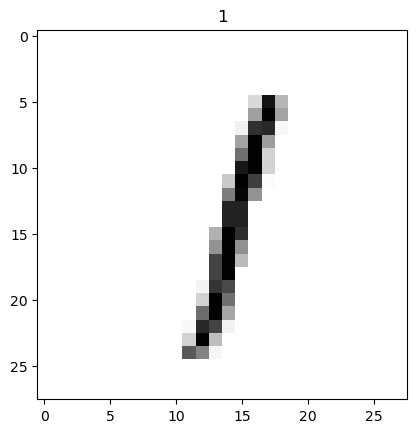

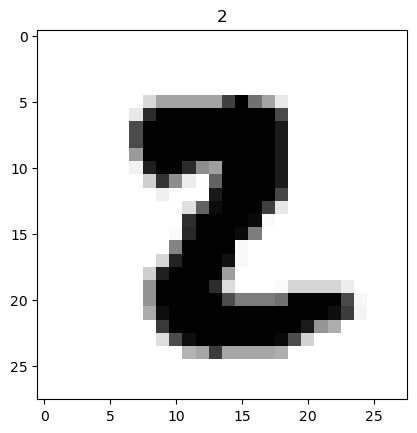

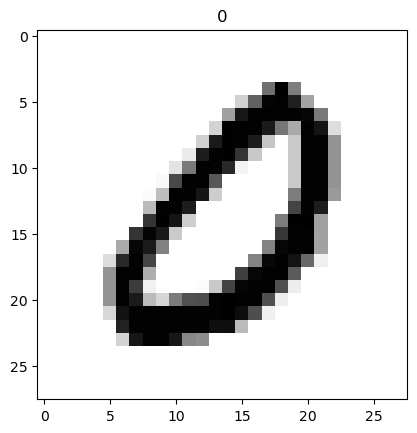

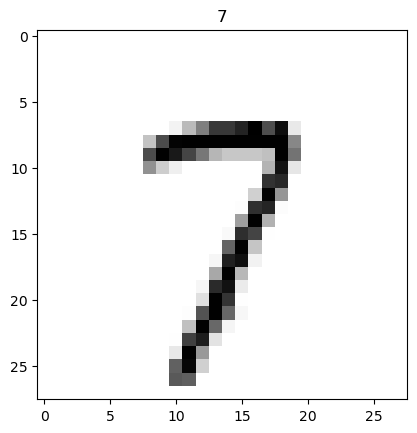

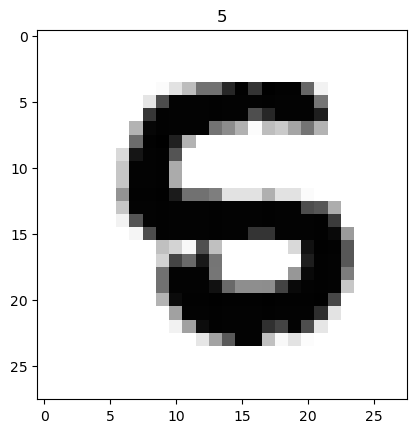

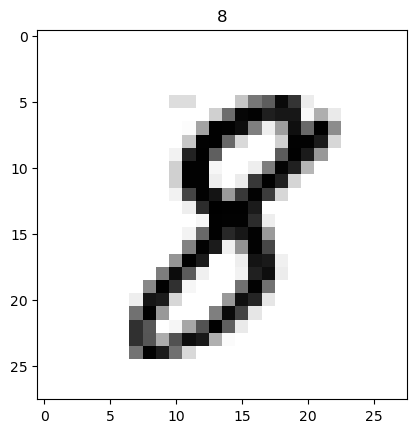

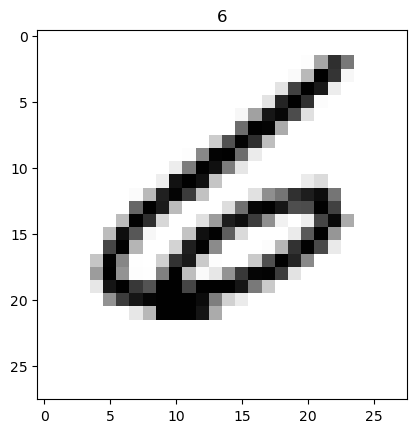

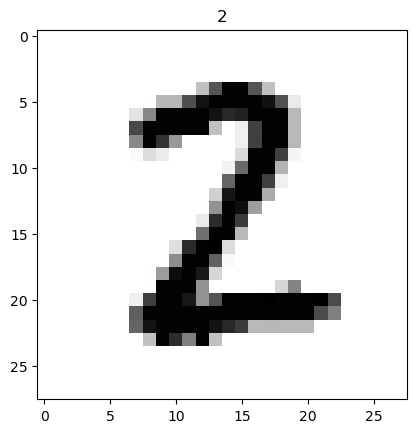

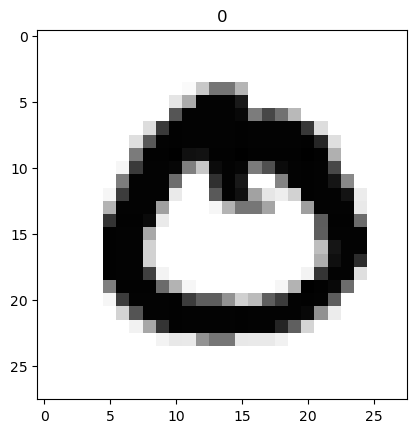

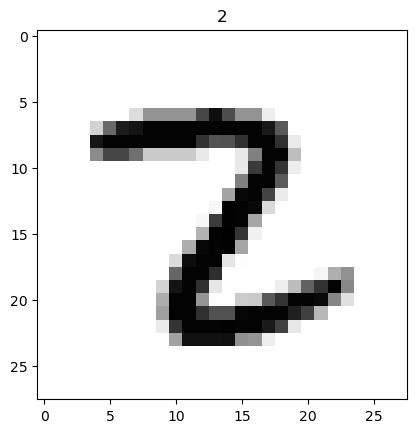

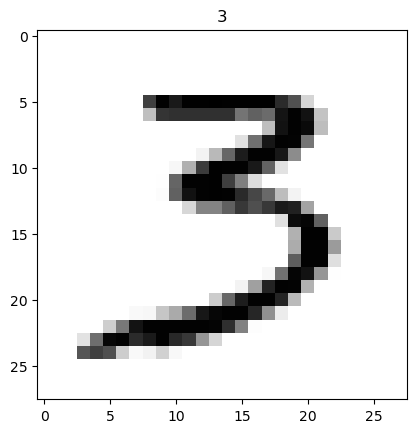

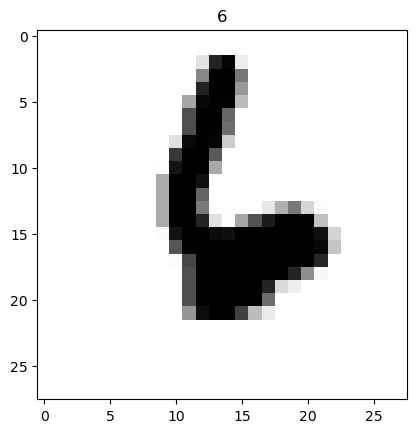

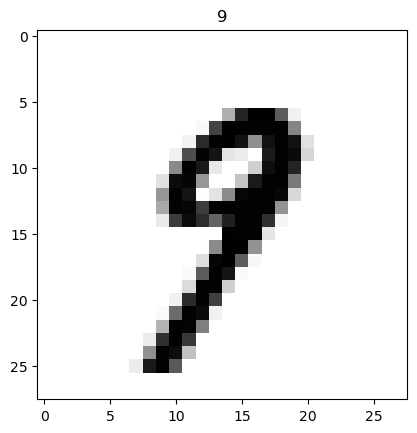

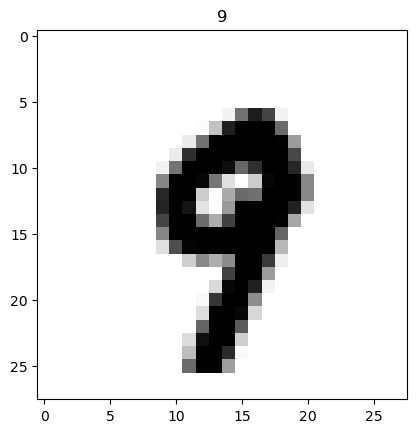

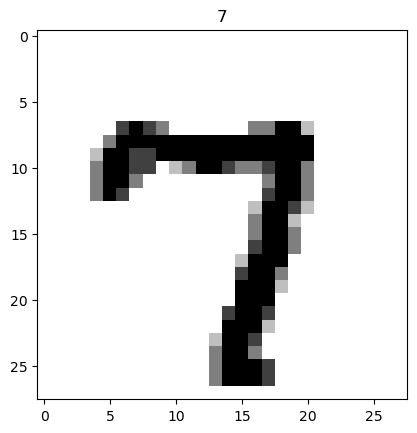

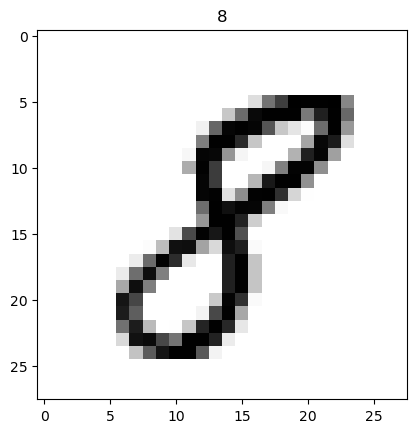

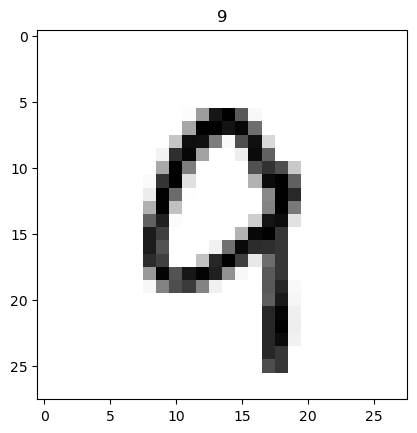

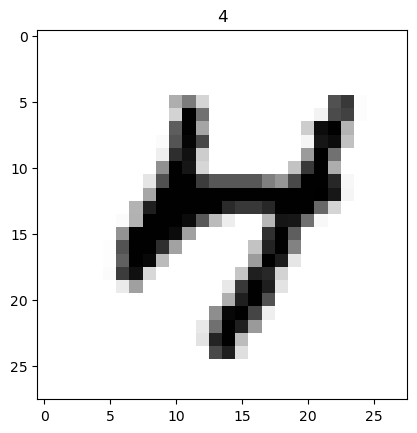

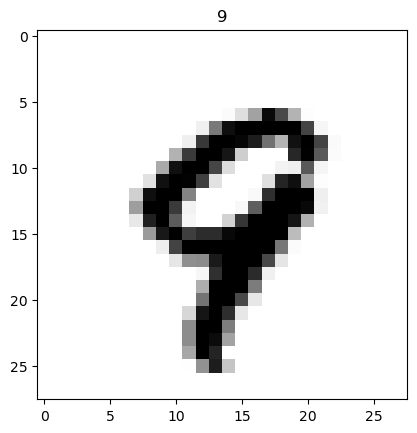

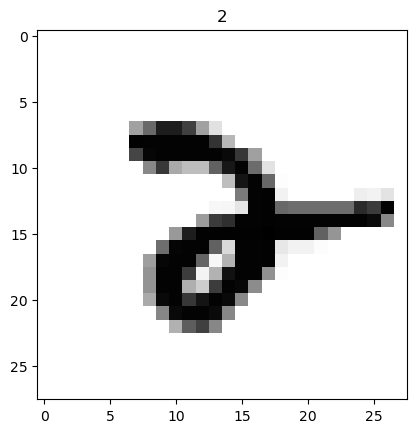

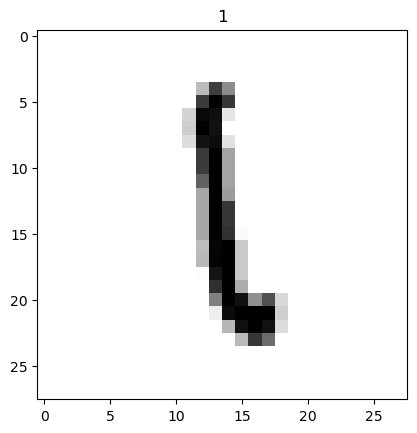

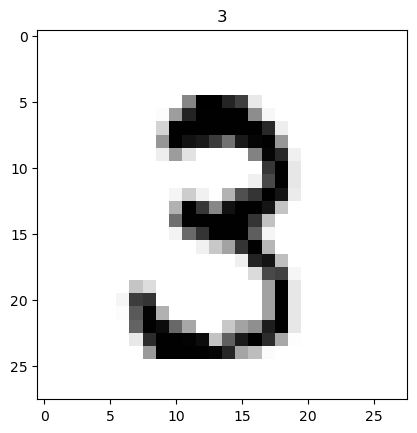

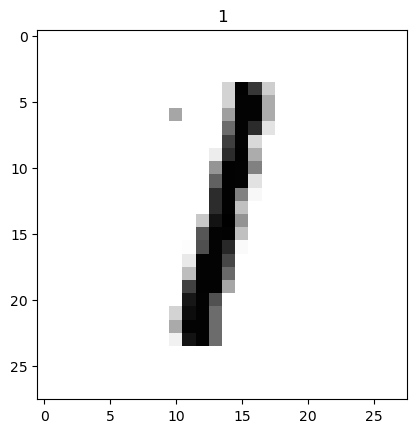

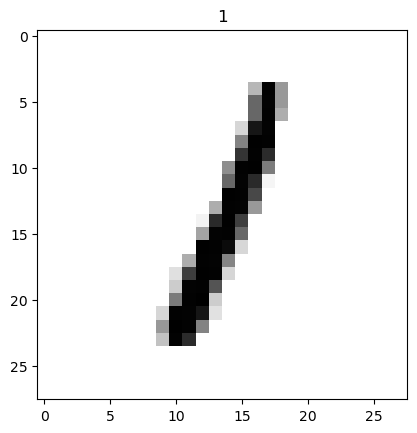

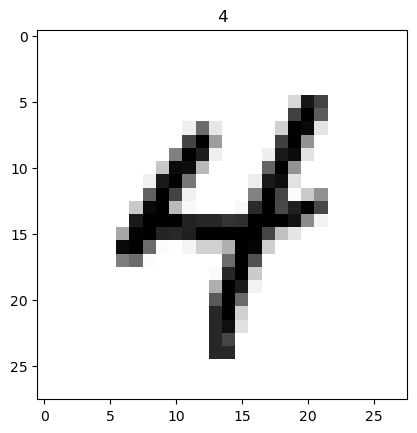

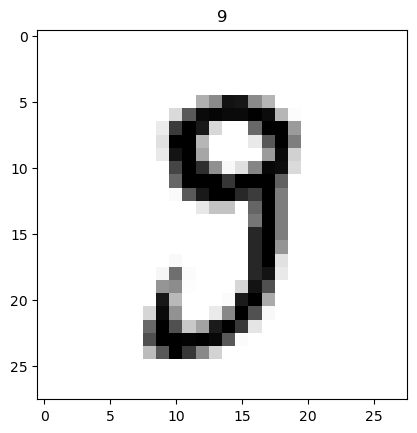

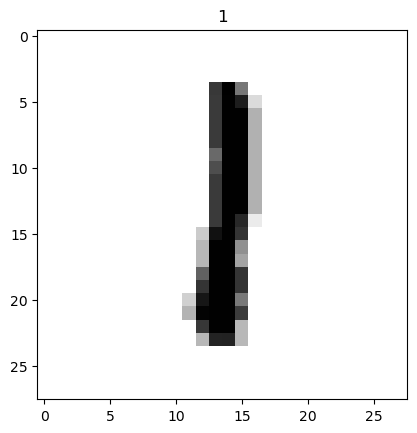

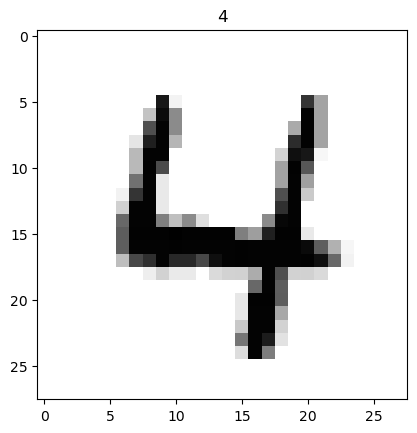

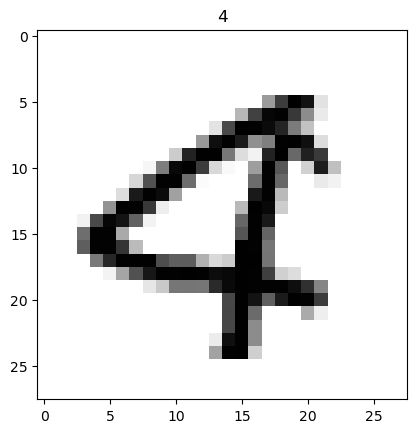

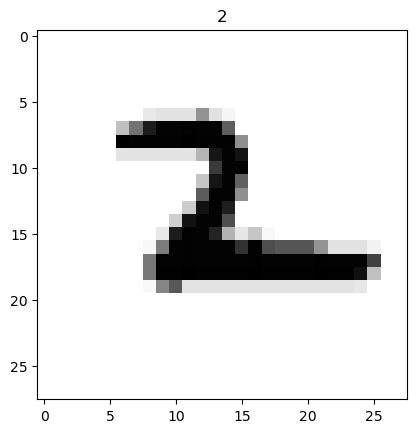

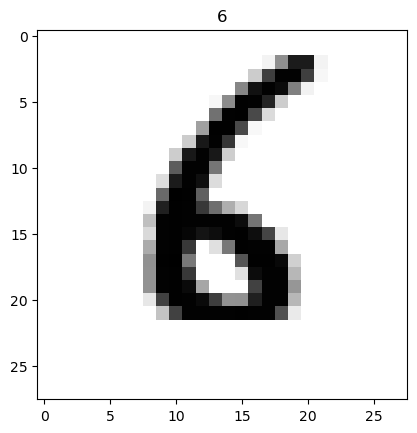

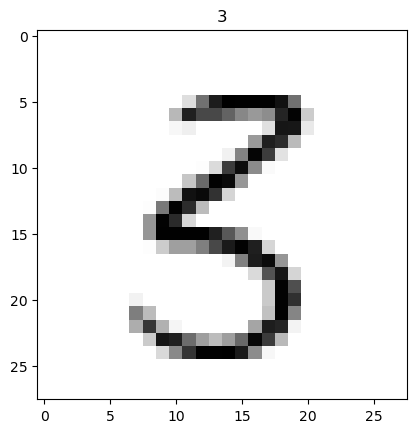

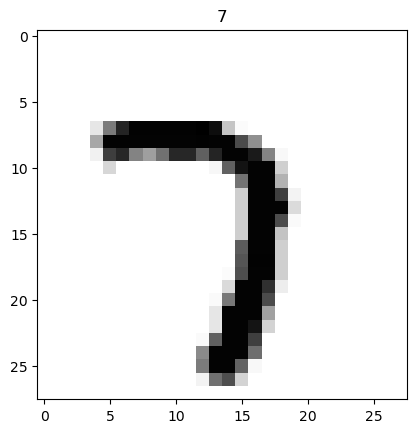

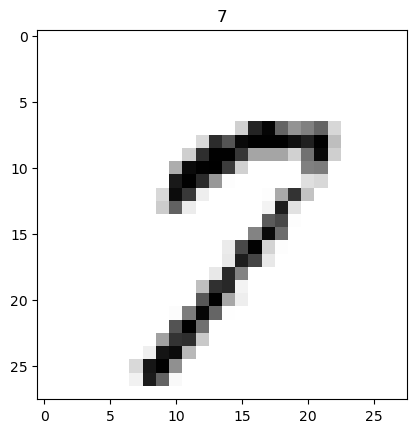

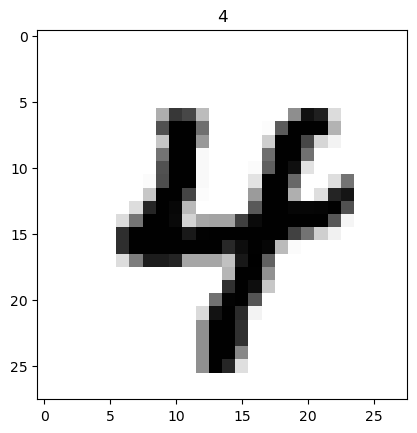

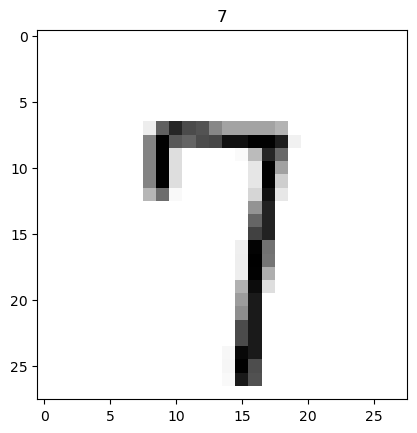

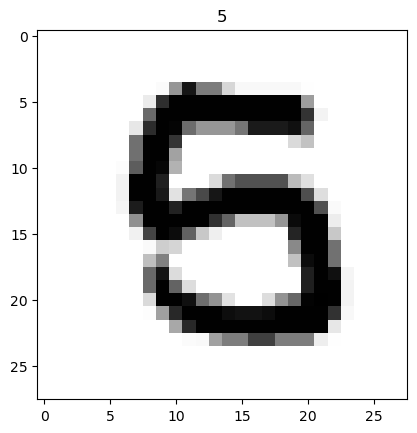

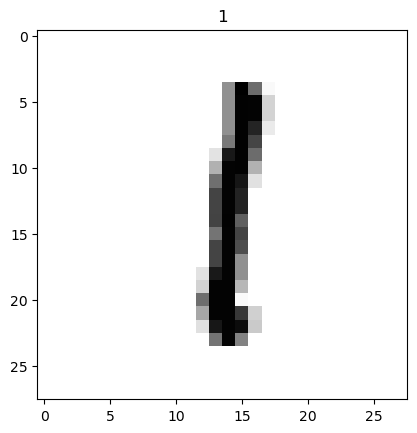

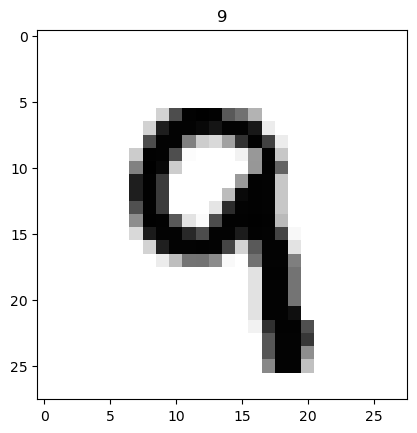

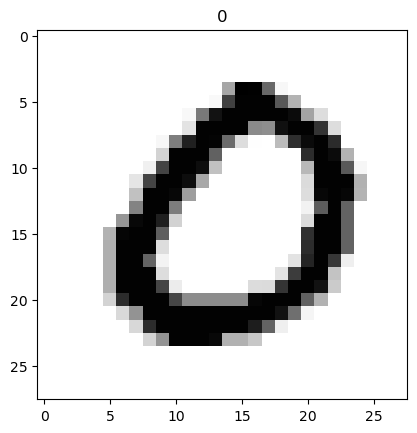

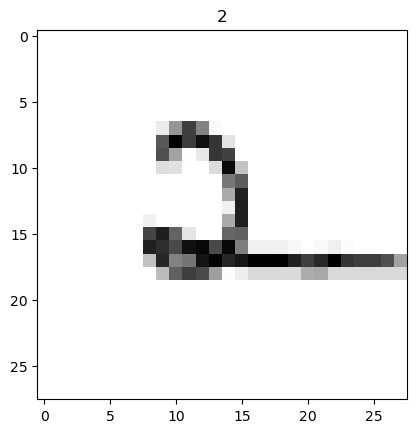

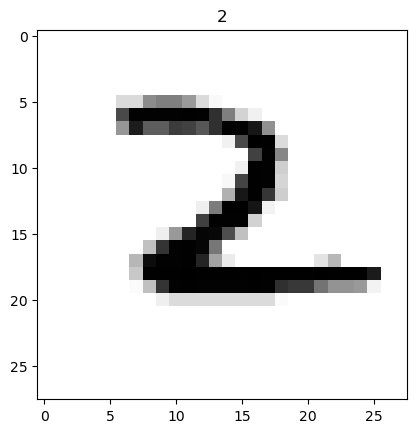

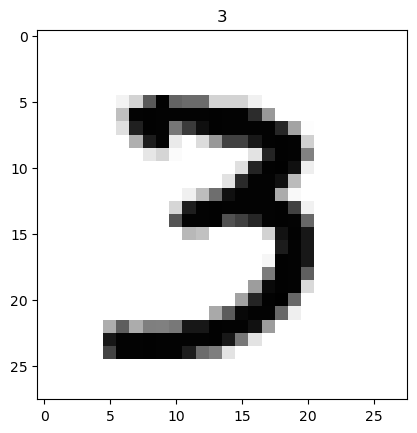

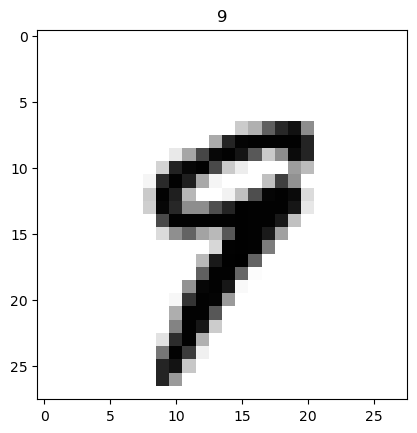

KeyboardInterrupt: 

In [9]:
trainFile = "./train.csv"
labels = []
img = np.array((28, 28), dtype=np.uint8)

with open(trainFile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            labels.append(row[0])
            img = np.array(row[1:], dtype=np.uint8).reshape((28, 28))
            img = 255-img
            show_images([img], [row[0]])
            

In [7]:
hog_result = extract_hog_features(img)
print(hog_result.shape)

(1296,)
